In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,Llamadas obscenas,1996
1,Beach Boy Rebels,1969
2,Scandal,1917
3,Mano mano 2: Ubusan ng lakas,2001
4,Karate daisenso,1978


In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [15]:
ch = cast[(cast.character == "Superman") | (cast.character == "Batman")].groupby(['year', 'character']).size().unstack()
ch = ch.fillna(0)
ch[ch.Superman > ch.Batman]

character,Batman,Superman
year,,
1948,0.0,1.0
1950,0.0,1.0
1951,0.0,2.0
1954,0.0,5.0
1955,0.0,1.0
1973,1.0,2.0
1978,0.0,2.0
1980,0.0,3.0
1981,1.0,2.0


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [16]:
ch[ch.Superman < ch.Batman]

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1949,2.0,0.0
1953,2.0,0.0
1957,2.0,0.0
1965,1.0,0.0
1967,1.0,0.0
1988,1.0,0.0


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [24]:
cast.groupby(['year','type']).size().unstack().fillna(0)

type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,0.0
1905,1.0,0.0
1906,14.0,3.0
1907,6.0,0.0
...,...,...
2022,12.0,4.0
2023,2.0,0.0
2024,9.0,6.0


### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

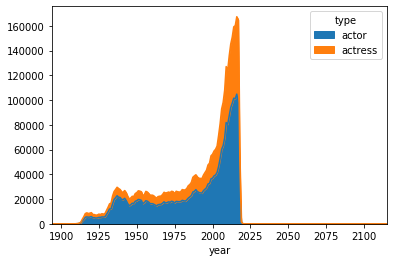

In [25]:
cast.groupby(['year','type']).size().unstack().fillna(0).plot(kind= 'area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.